In [ ]:
#Data-driven analysis of car sales prices with the influence of different features and prediction with linear regression model and model evaluation.

*  تحلیل داده‌محور قیمت‌های فروش خودرو با تأثیر ویژگی‌های مختلف و پیش‌بینی با مدل رگرسیون خطی و ارزیابی مدل.


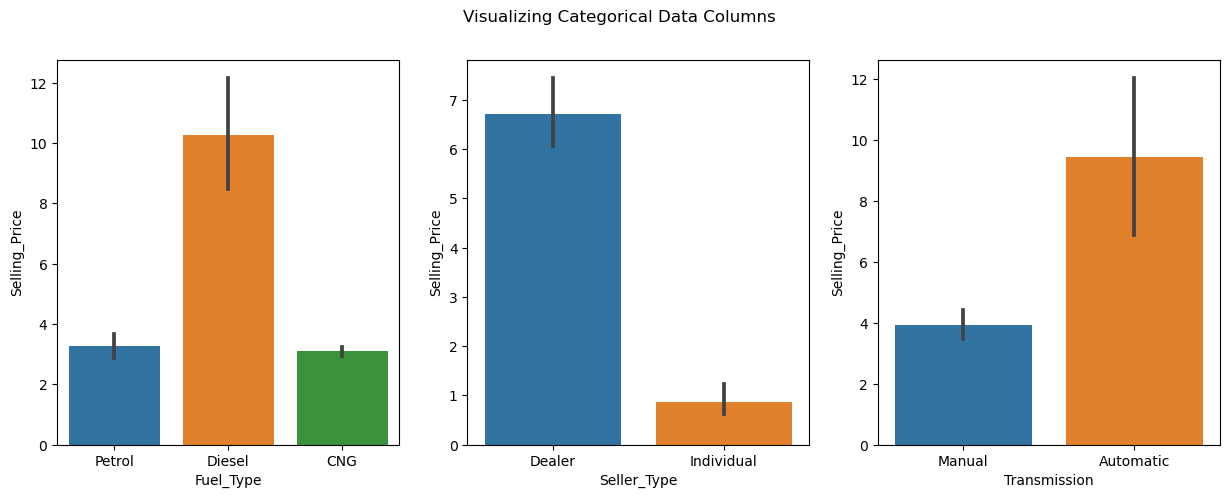

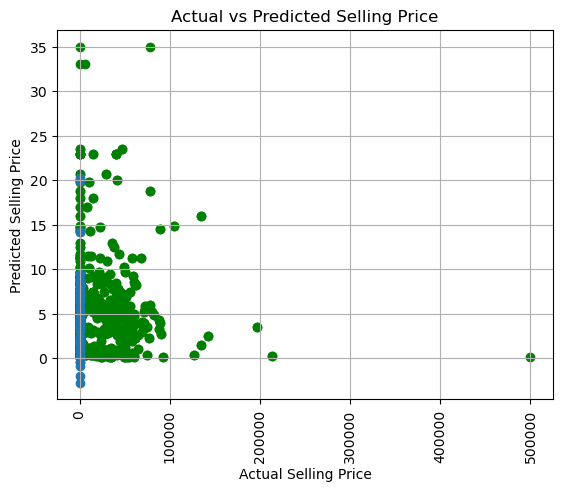

Mean Absolute Error: 1.0000326012144785
Mean Squared Error: 2.188556445657233
Root Mean Squared Error: 1.4793770464818066
R2 Score: 0.9134181721224687
Cross-Validation Results: [0.86197454 0.79865255 0.69398543 0.88660853]
Mean Cross-Validation Score: 0.8103052644966151


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

# Load the car data
car_data = pd.read_csv('cardata.csv')

# Drop the 'Car_Name' column
car_data = car_data.drop(columns=["Car_Name"])

# Calculate the age of the cars
car_data['Age'] = 2018 - car_data['Year']

# Define categorical columns
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Visualize categorical data
plt.figure(figsize=(15, 5))
plt.suptitle('Visualizing Categorical Data Columns')

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=column, y='Selling_Price', data=car_data)
    plt.xlabel(column)
    plt.ylabel('Selling_Price')

plt.show()

# Scatter plot of 'Present_Price' vs 'Selling_Price'
plt.scatter(car_data['Present_Price'], car_data['Selling_Price'], color='green')
plt.xlabel("Present_Price")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.grid()
plt.title("Car")
plt.savefig("car1")

# Filter data based on conditions
filtered_data = car_data[(car_data["Selling_Price"] < 25) & (car_data["Present_Price"] < 40)]

# Scatter plot of 'Present_Price' vs 'Selling_Price' for filtered data
plt.scatter(filtered_data['Present_Price'], filtered_data['Selling_Price'], color='green')
plt.xlabel("Present_Price")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.grid()
plt.title("Car")
plt.savefig("car2")

# Scatter plot of 'Kms_Driven' vs 'Selling_Price'
plt.scatter(car_data['Kms_Driven'], car_data['Selling_Price'], color='green')
plt.xlabel("Kms_Driven")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.grid()
plt.title("Car")
plt.savefig("car3")

# Further filter data
filtered_data = filtered_data[(filtered_data["Selling_Price"] < 25) & (filtered_data["Kms_Driven"] < 230000)]

# Scatter plot of 'Kms_Driven' vs 'Selling_Price' for filtered data
plt.scatter(filtered_data['Kms_Driven'], filtered_data['Selling_Price'], color='green')
plt.xlabel("Kms_Driven")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.grid()
plt.title("Car")
plt.savefig("car4")

# Replace categorical values with numerical values
car_data.replace({'Fuel_Type': {'Petrol': 1, 'Diesel': 2, 'CNG': 3}}, inplace=True)
car_data.replace({'Seller_Type': {'Individual': 1, 'Dealer': 2}}, inplace=True)
car_data.replace({'Transmission': {'Manual': 1, 'Automatic': 2}}, inplace=True)

# Split the data into features (x) and target (y)
x = car_data[['Year', 'Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = car_data['Selling_Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predict selling prices on the test data
y_pred = regressor.predict(x_test)

# Scatter plot of actual vs predicted selling prices
plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

# Calculate model metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

# Cross-validation using K-Fold
kf = KFold(n_splits=4, shuffle=True, random_state=0)
cv_results = cross_val_score(regressor, x, y, cv=kf)

print("Cross-Validation Results:", cv_results)
print("Mean Cross-Validation Score:", np.mean(cv_results))
